# Dynamo-based drivers analysis

Notebook uses dynamo's LAP analysis to identify key drivers.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import dynamo as dyn
import scanpy as sc
import scvelo as scv
from dynamo.tools.utils import nearest_neighbors

from rgv_tools import DATA_DIR

/home/icb/weixu.wang/miniconda3/envs/dynamo/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/dynamo/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/dynamo/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/dynamo/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/dynamo/lib/python3.10/site-packag

## General settings

In [2]:
plt.rcParams["svg.fonttype"] = "none"
sns.reset_defaults()
sns.reset_orig()
scv.settings.set_figure_params("scvelo", dpi_save=400, dpi=80, transparent=True, fontsize=14, color_map="viridis")

In [3]:
dyn.dynamo_logger.main_silence()

## Constants

In [4]:
DATASET = "hematopoiesis"

SAVE_DATA = True
if SAVE_DATA:
    (DATA_DIR / DATASET / "results").mkdir(parents=True, exist_ok=True)

In [5]:
cell_type = ["HSC", "Ery", "Mon"]

In [6]:
fixed_points = np.array(
    [
        [8.45201833, 9.37697661],
        [14.00630381, 2.53853712],
        [17.30550636, 6.81561775],
        [18.06891717, 11.9840678],
        [14.13613403, 15.22244713],
        [9.72644402, 14.83745969],
    ]
)

## Data loading

In [7]:
adata_labeling = sc.read_h5ad(DATA_DIR / DATASET / "raw" / "hsc_dynamo_adata.h5ad")

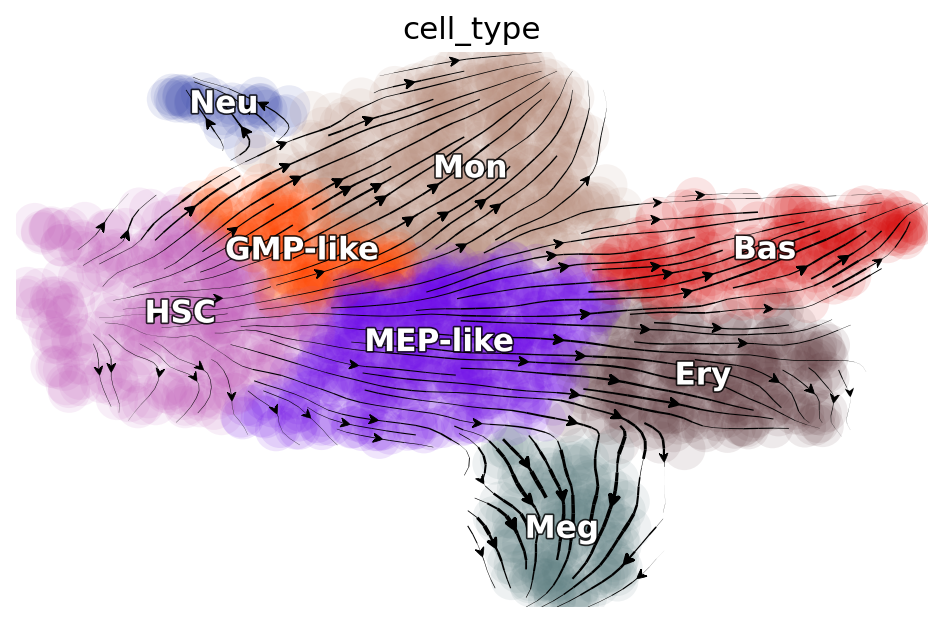

In [8]:
dyn.pl.streamline_plot(adata_labeling, basis="umap", color="cell_type")

HSC_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "HSC")
Meg_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "Meg")
Ery_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "Ery")
Bas_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "Bas")
Mon_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "Mon")
Neu_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "Neu")

## Dynamo pipeline

In [9]:
HSC_cells_indices = nearest_neighbors(fixed_points[0], adata_labeling.obsm["X_umap"])
Meg_cells_indices = nearest_neighbors(fixed_points[1], adata_labeling.obsm["X_umap"])
Ery_cells_indices = nearest_neighbors(fixed_points[2], adata_labeling.obsm["X_umap"])
Bas_cells_indices = nearest_neighbors(fixed_points[3], adata_labeling.obsm["X_umap"])
Mon_cells_indices = nearest_neighbors(fixed_points[4], adata_labeling.obsm["X_umap"])
Neu_cells_indices = nearest_neighbors(fixed_points[5], adata_labeling.obsm["X_umap"])

In [10]:
plt.scatter(*adata_labeling.obsm["X_umap"].T)
for indices in [
    HSC_cells_indices,
    Meg_cells_indices,
    Ery_cells_indices,
    Bas_cells_indices,
    Mon_cells_indices,
    Neu_cells_indices,
]:
    plt.scatter(*adata_labeling[indices[0]].obsm["X_umap"].T)

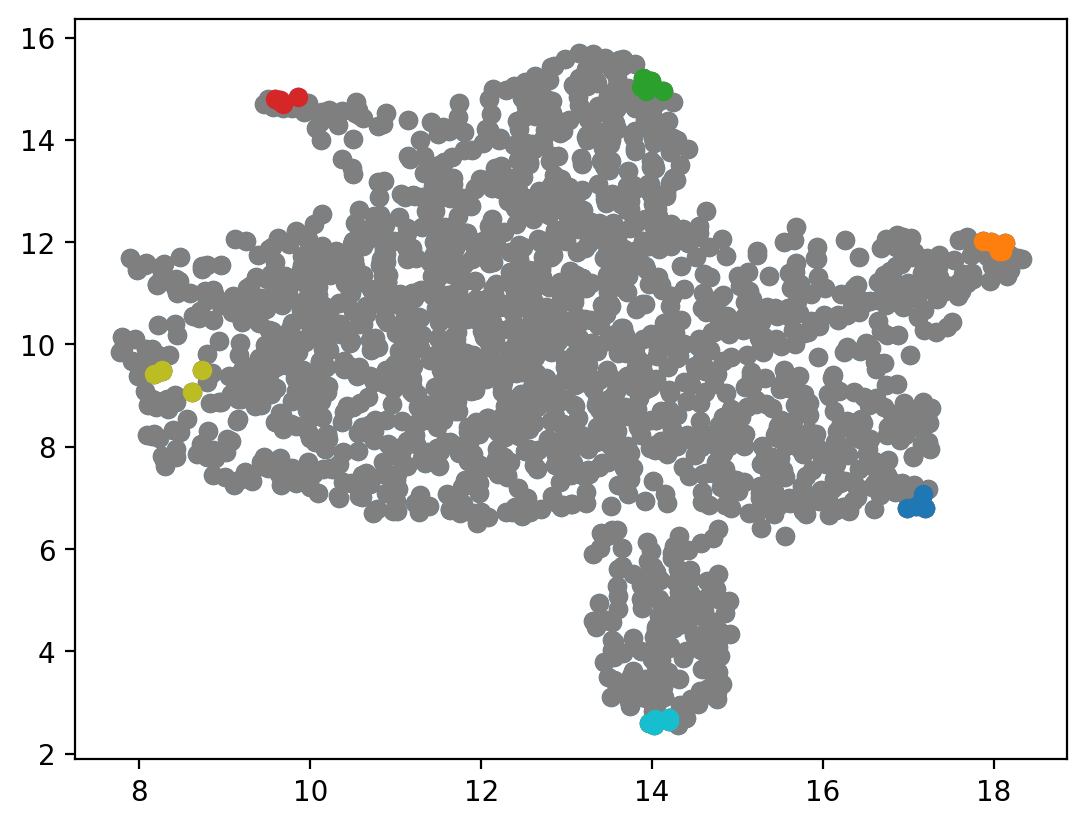

In [11]:
plt.scatter(*adata_labeling.obsm["X_umap"].T)
for indices in [
    HSC_cells_indices,
    Meg_cells_indices,
    Ery_cells_indices,
    Bas_cells_indices,
    Mon_cells_indices,
    Neu_cells_indices,
]:
    plt.scatter(*adata_labeling[indices[0]].obsm["X_umap"].T)
plt.show()

In [12]:
dyn.tl.neighbors(adata_labeling, basis="umap", result_prefix="umap")

|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:umap
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected


AnnData object with n_obs × n_vars = 1947 × 21701
    obs: 'batch', 'cell_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'query', 'scopes', '_id', '_score', 'symbol', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'score', 'log_m', 'frac', 'use_for_pca'
    uns: 'PCs', 'batch_colors', 'cell_type_colors', 'draw_graph', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'genes_to_use', 'grid_velocity_umap', 'neighbors', 'pca_mean', 'pp', 'velocyto_SVR', 'umap_neighbors'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'M_n', 'M_nn', 'M_s', 'M_ss', 'M_t', 'M_tn', 'M_tt', 'M_u', 'M_us', 'M_uu', 'X_new', 'X_spliced', 'X_total', 'X_unspliced', 'new', 'spliced', 'total', 'unspliced', '

In [13]:
dyn.tl.cell_velocities(
    adata_labeling,
    enforce=True,
    X=adata_labeling.layers["M_t"],
    V=adata_labeling.layers["velocity_alpha_minus_gamma_s"],
    method="cosine",
    basis="pca",
)
dyn.vf.VectorField(adata_labeling, basis="pca")

|-----> [calculating transition matrix via cosine kernel with sqrt transform.] in progress: 100.0000%|-----> [calculating transition matrix via cosine kernel with sqrt transform.] completed [206.0417s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.6028s]
|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: PCA. 
        Vector field will be learned in the PCA space.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] completed [0.3383s]
|-----> [VectorField] completed [0.4921s]


In [14]:
transition_graph = {}
start_cell_indices = [
    HSC_cells_indices,
    Ery_cells_indices,
    Mon_cells_indices,
]
end_cell_indices = start_cell_indices
for i, start in enumerate(start_cell_indices):
    for j, end in enumerate(end_cell_indices):
        if start is not end:
            min_lap_t = True if i == 0 else False
            lap = dyn.pd.least_action(
                adata_labeling,
                [adata_labeling.obs_names[start[0]][0]],
                [adata_labeling.obs_names[end[0]][0]],
                basis="pca",
                adj_key="cosine_transition_matrix",
                min_lap_t=min_lap_t,
                EM_steps=2,
            )
            # The `GeneTrajectory` class can be used to output trajectories for any set of genes of interest
            gtraj = dyn.pd.GeneTrajectory(adata_labeling)
            gtraj.from_pca(lap.X, t=lap.t)
            gtraj.calc_msd()
            ranking = dyn.vf.rank_genes(adata_labeling, "traj_msd")

            print(start, "->", end)
            genes = ranking[:5]["all"].to_list()
            arr = gtraj.select_gene(genes)

            transition_graph[cell_type[i] + "->" + cell_type[j]] = {
                "lap": lap,
                "LAP_pca": adata_labeling.uns["LAP_pca"],
                "ranking": ranking,
                "gtraj": gtraj,
            }

|-----> searching for the least action path...
|-----> [iterating through 1 pairs] in progress: 100.0000%|-----------> initializing path with the shortest path in the graph built from the velocity transition matrix...
|-----------> optimizing for least action path...
|-----> optimal action: 0.020795
|-----> [iterating through 1 pairs] completed [61.0991s]
|-----> [least action path] completed [61.3269s]
[[1587 1557 1725 1091 1070]] -> [[107 403  22 729 114]]
|-----> searching for the least action path...
|-----> [iterating through 1 pairs] in progress: 100.0000%|-----------> initializing path with the shortest path in the graph built from the velocity transition matrix...
|-----------> optimizing for least action path...
|-----> optimal action: 0.023732
|-----> [iterating through 1 pairs] completed [57.3284s]
|-----> [least action path] completed [57.3649s]
[[1587 1557 1725 1091 1070]] -> [[583 406  82 273 477]]
|-----> searching for the least action path...
|-----> [iterating through 

In [15]:
## evaluate ranking from HSC to Mon and Ery
HSC_Mon_ranking = transition_graph["HSC->Mon"]["ranking"]
HSC_Ery_ranking = transition_graph["HSC->Ery"]["ranking"]

## Save dataset

In [16]:
if SAVE_DATA:
    HSC_Mon_ranking.to_csv(DATA_DIR / DATASET / "results" / "HSC_Mon_ranking.csv")
    HSC_Ery_ranking.to_csv(DATA_DIR / DATASET / "results" / "HSC_Ery_ranking.csv")